In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.regressionplots import influence_plot

In [5]:
#reading the data from the file'ToyotaCorolla.csv'
cars=pd.read_csv("/content/ToyotaCorolla (1).csv")

In [6]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:

Corolla=cars[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]


In [8]:
Corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
Corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
Corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [11]:
Corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

Correlation Matrix

In [12]:
Corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


Scatterplot between variables along Histogram

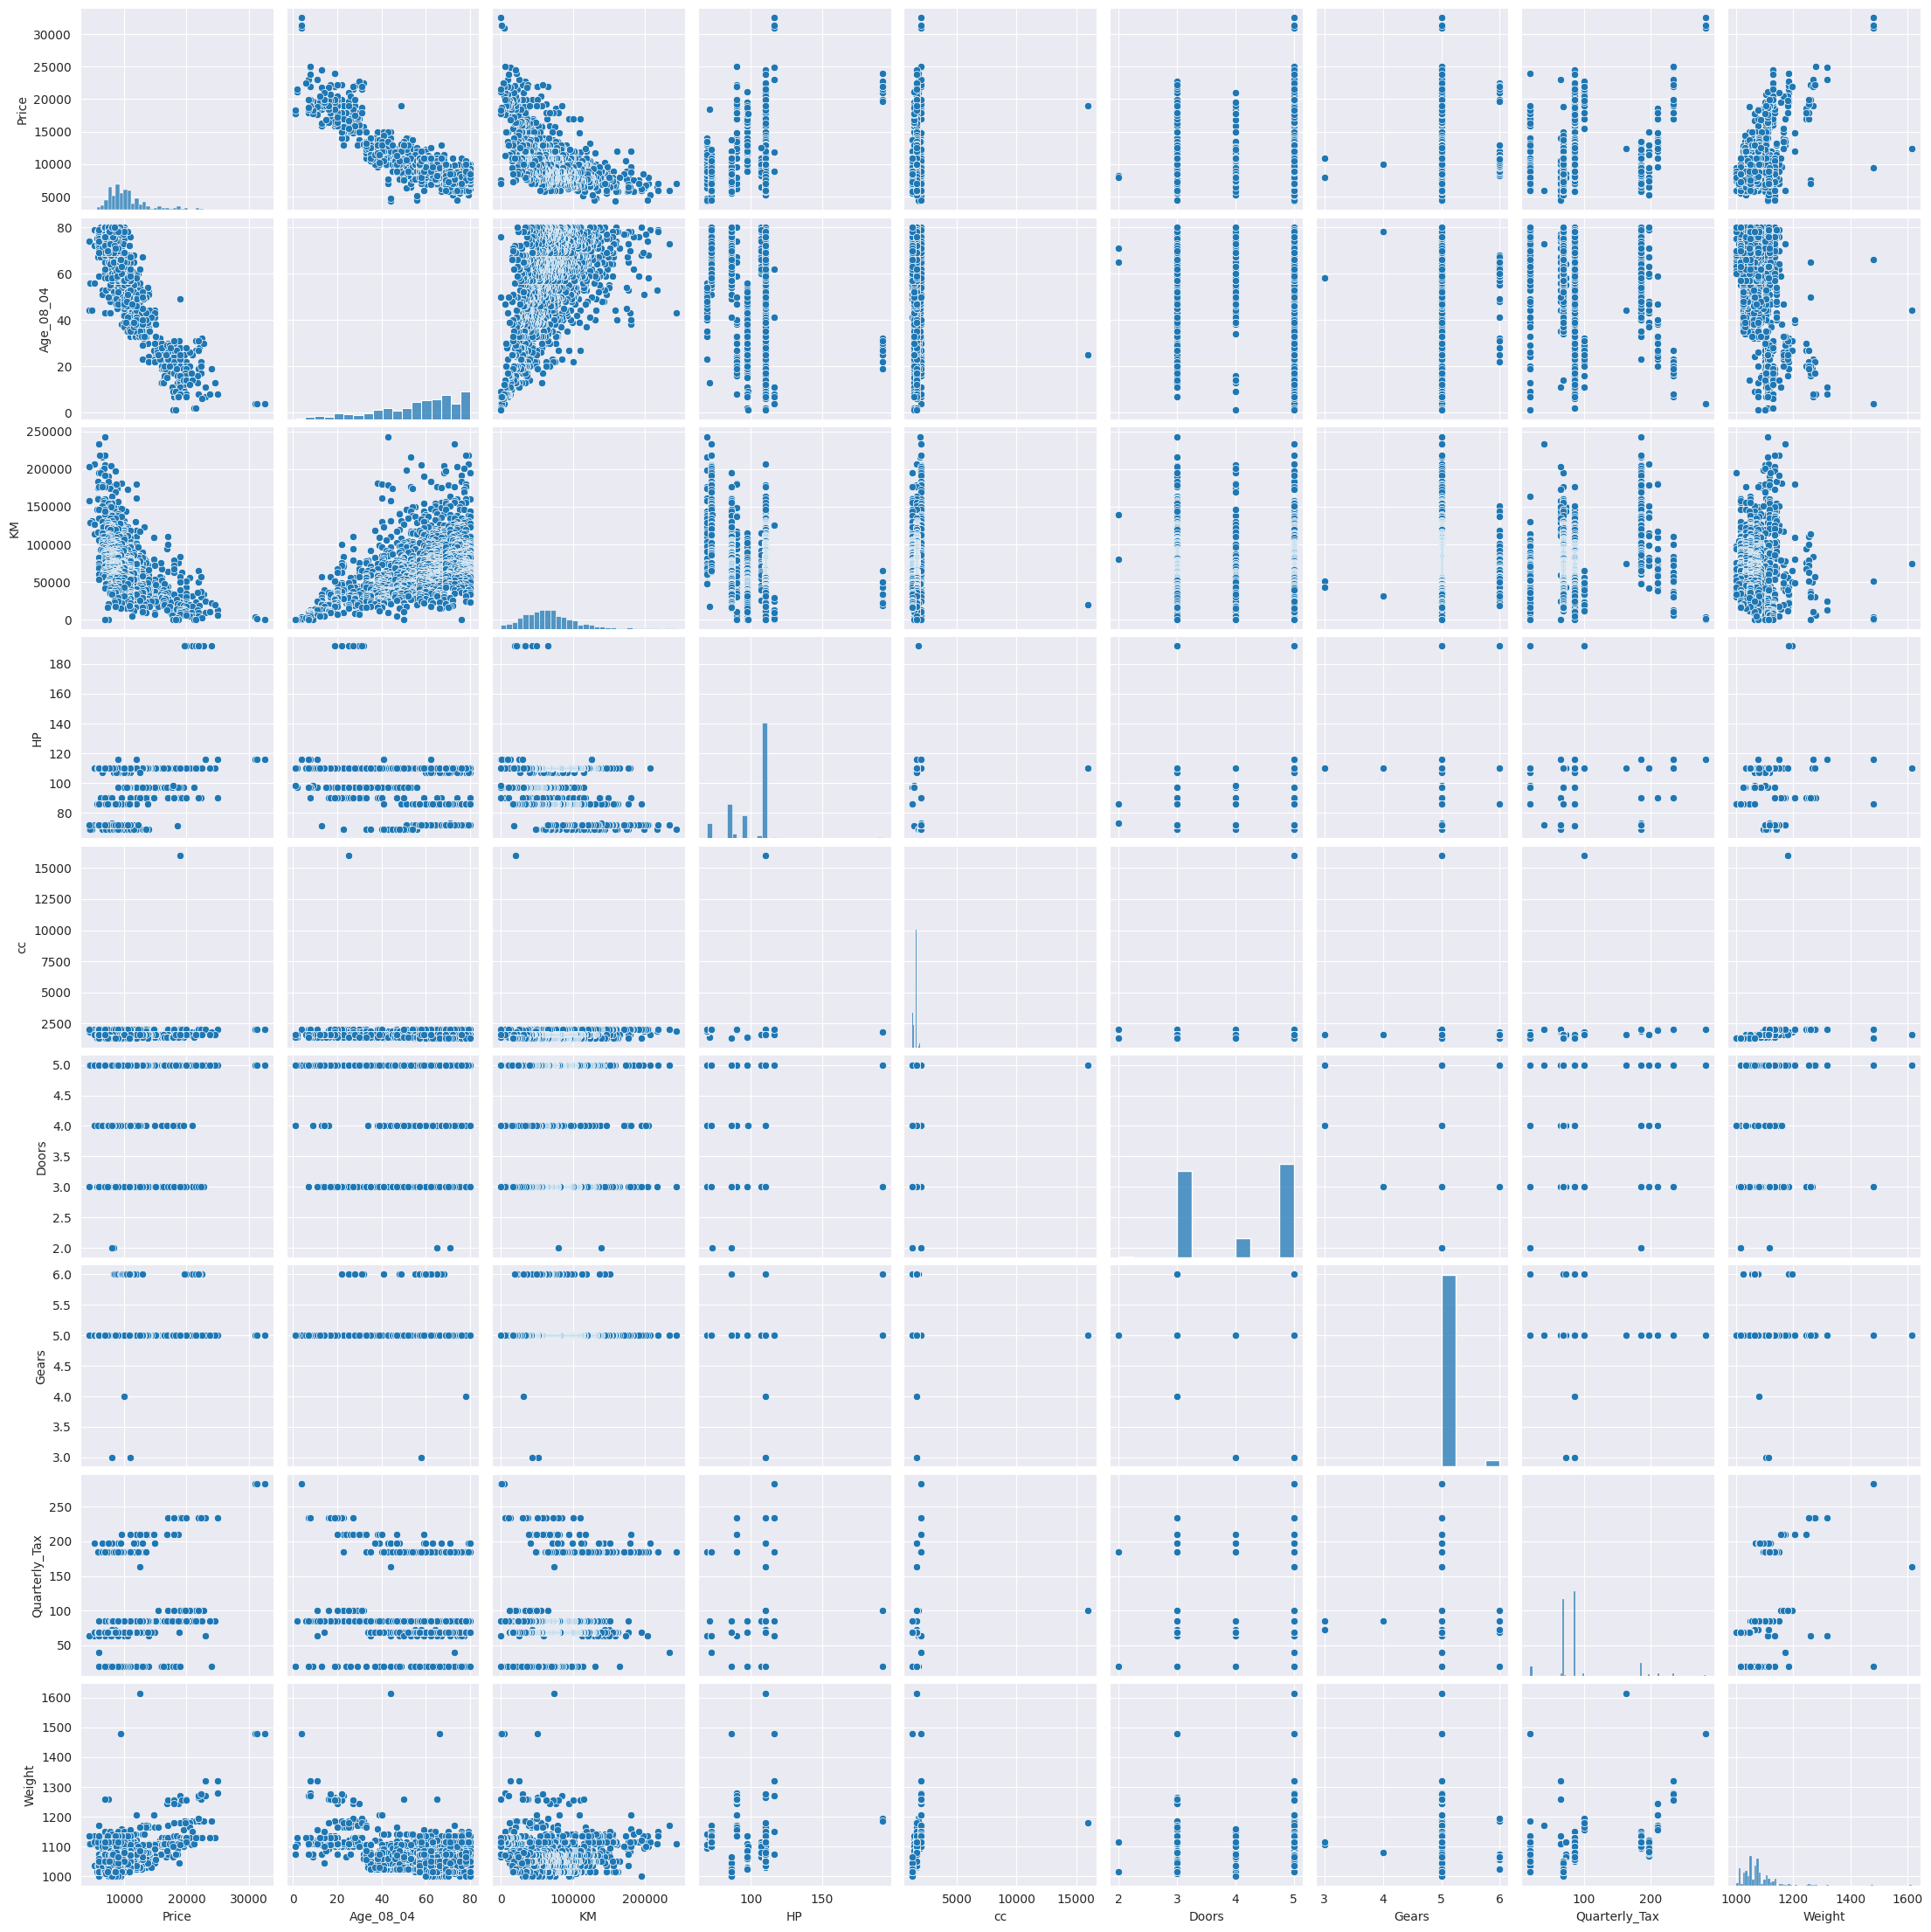

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(Corolla)

Preparing Text Model

In [14]:
#rename
cars=Corolla.rename({'Age_08_04':'Age','Quarterly_Tax':'Tax'},axis=1)

In [15]:
cars

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


<Axes: >

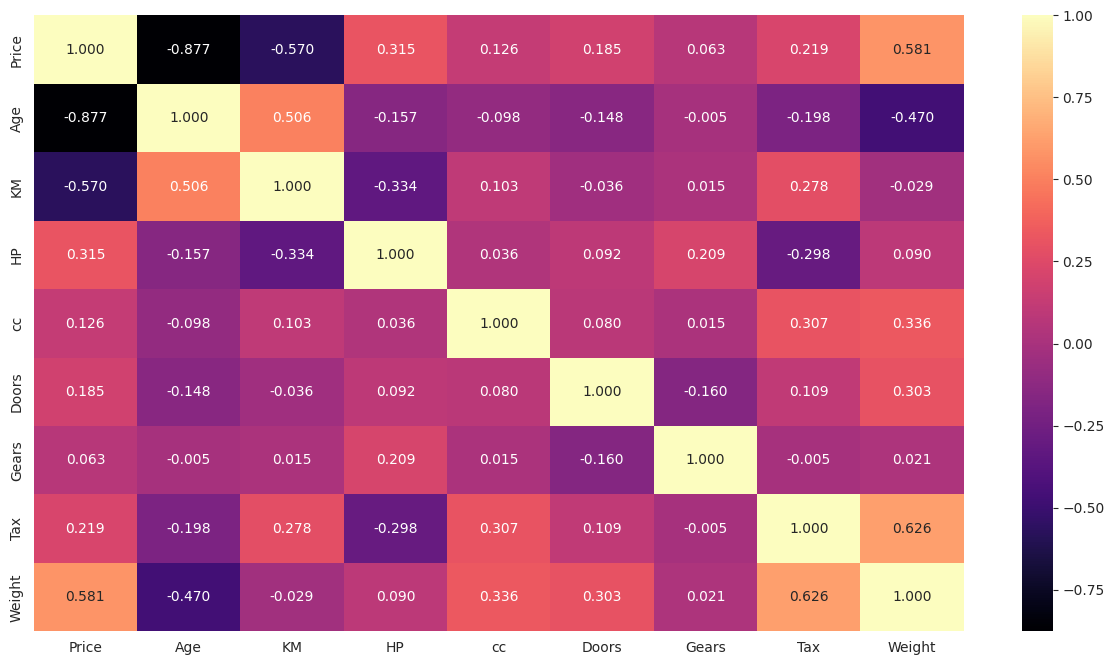

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(cars.corr(), cmap='magma', annot=True, fmt=".3f")

Graphs

<Axes: xlabel='Price', ylabel='HP'>

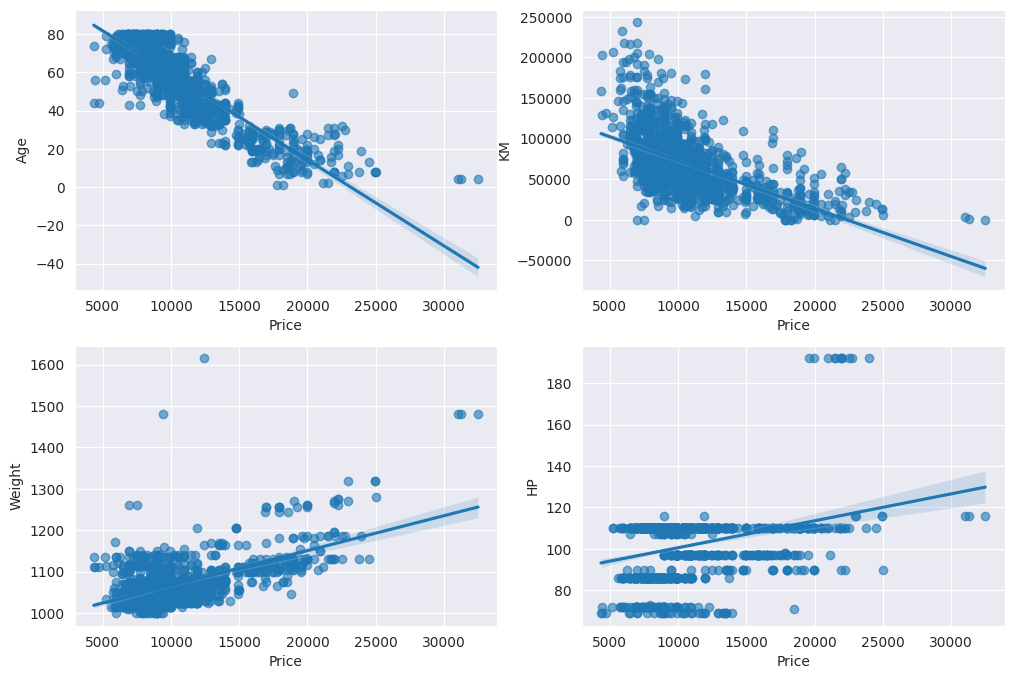

In [19]:
f, axes=plt.subplots(2,2, figsize=(12,8))
sns.regplot(x='Price',y='Age',data=cars,scatter_kws={'alpha':0.6},ax=axes[0,0])
sns.regplot(x='Price',y='KM',data=cars,scatter_kws={'alpha':0.6},ax=axes[0,1])
sns.regplot(x='Price',y='Weight',data=cars,scatter_kws={'alpha':0.6},ax=axes[1,0])
sns.regplot(x='Price',y='HP',data=cars,scatter_kws={'alpha':0.6},ax=axes[1,1])


Model Building

Using Sklearn

In [20]:
X=cars.drop('Price',axis=1).values
Y=cars.iloc[:,0].values.reshape(-1,1)


In [21]:
X

array([[   23, 46986,    90, ...,     5,   210,  1165],
       [   23, 72937,    90, ...,     5,   210,  1165],
       [   24, 41711,    90, ...,     5,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     5,    69,  1015],
       [   70, 16916,    86, ...,     5,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]])

In [22]:
Y

array([[13500],
       [13750],
       [13950],
       ...,
       [ 8500],
       [ 7250],
       [ 6950]])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
print("shape of X_train:",X_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of Y_train:",Y_train.shape)
print("shape of Y_test:",Y_test.shape)

shape of X_train: (1077, 8)
shape of X_test: (359, 8)
shape of Y_train: (1077, 1)
shape of Y_test: (359, 1)


In [25]:
from sklearn.linear_model import LinearRegression
regressor_linear =LinearRegression()
regressor_linear.fit(X_train,Y_train)

LinearRegression()

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
cv_linear=cross_val_score(estimator=regressor_linear,X=X_train,y=Y_train,cv=10)
#predicting r2_score the train set results
y_pred_linear_train=regressor_linear.predict(X_train)
r2_score_linear_train=r2_score(Y_train,y_pred_linear_train)
#predicting r2_score the test set results
y_pred_linear_test=regressor_linear.predict(X_test)
r2_score_linear_test=r2_score(Y_test,y_pred_linear_test)
rmse_linear=(np.sqrt(mean_squared_error(Y_test,y_pred_linear_test)))
print("CV:",cv_linear.mean())
print("r2_score(train):",r2_score_linear_train)
print("r2_score(test):",r2_score_linear_test)
print("RMSE:",rmse_linear)

CV: 0.7719638138218404
r2_score(train): 0.8640307618150082
r2_score(test): 0.8614722799605136
RMSE: 1402.0810748973886


In [32]:
regressor_linear.rank_

8

In [33]:
regressor_linear.coef_

array([[-1.21320641e+02, -2.01353093e-02,  2.95093022e+01,
        -7.75554068e-02,  2.06641923e+01,  5.83104153e+02,
         1.83035074e+00,  1.78505581e+01]])

In [34]:
regressor_linear.intercept_

array([-6263.01172068])

In [37]:
car_new=pd.DataFrame({"Age_08_04":32,"KM":38500, "HP":78,"cc":1500,"Doors":3,"Gears":5,"Quarterly_Tax":200,"Weight":1200 },index=[1])
regressor_linear.predict(car_new)
print("The price will be:",regressor_linear.predict(car_new))

The price will be: [[16029.16408435]]


Using stats.ols


In [42]:
model = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight",data = cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:41:00   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Tax            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculating VIF



In [45]:
rsq_age = smf.ols('Age~KM+HP+cc+Doors+Gears+Tax+Weight',data=cars).fit().rsquared
vif_age = 1/(1-rsq_age) # 1.88

rsq_km = smf.ols('KM~Age+HP+cc+Doors+Gears+Tax+Weight',data=cars).fit().rsquared
vif_km = 1/(1-rsq_km) #  1.76

rsq_hp = smf.ols('HP~Age+KM+cc+Doors+Gears+Tax+Weight',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp) #  1.42

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+Tax+Weight',data=cars).fit().rsquared
vif_cc = 1/(1-rsq_cc) # 1.16

rsq_doors = smf.ols('Doors~Age+KM+HP+cc+Gears+Tax+Weight',data=cars).fit().rsquared
vif_doors = 1/(1-rsq_doors) #  1.16

rsq_gears = smf.ols('Gears~Age+KM+HP+cc+Doors+Tax+Weight',data=cars).fit().rsquared
vif_gears = 1/(1-rsq_gears) #  1.1

rsq_tax = smf.ols('Tax~Age+KM+HP+cc+Doors+Gears+Weight',data=cars).fit().rsquared
vif_tax = 1/(1-rsq_tax) #  2.31

rsq_weight = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+Tax',data=cars).fit().rsquared
vif_weight = 1/(1-rsq_weight) #  2.52

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Tax,2.311431
7,Weight,2.516420


Residual Vs Regressors

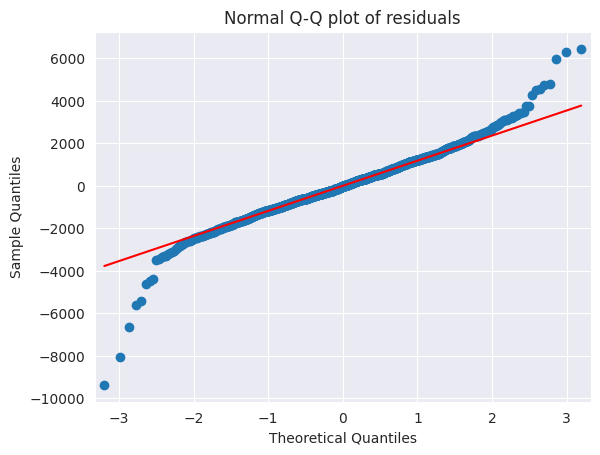

In [51]:
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


Residual Plot for Homoscedasticity


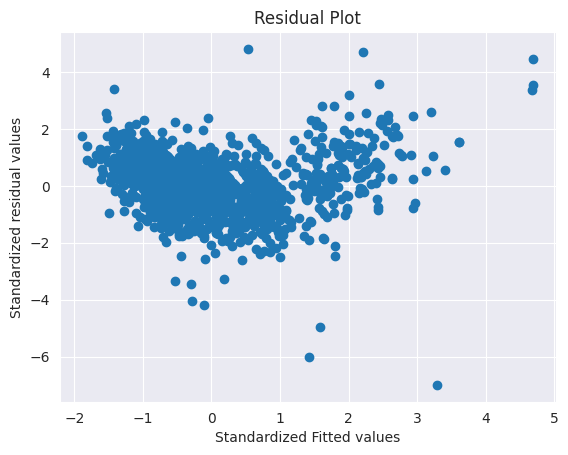

In [52]:
def a( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(a(model.fittedvalues),
           a(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors


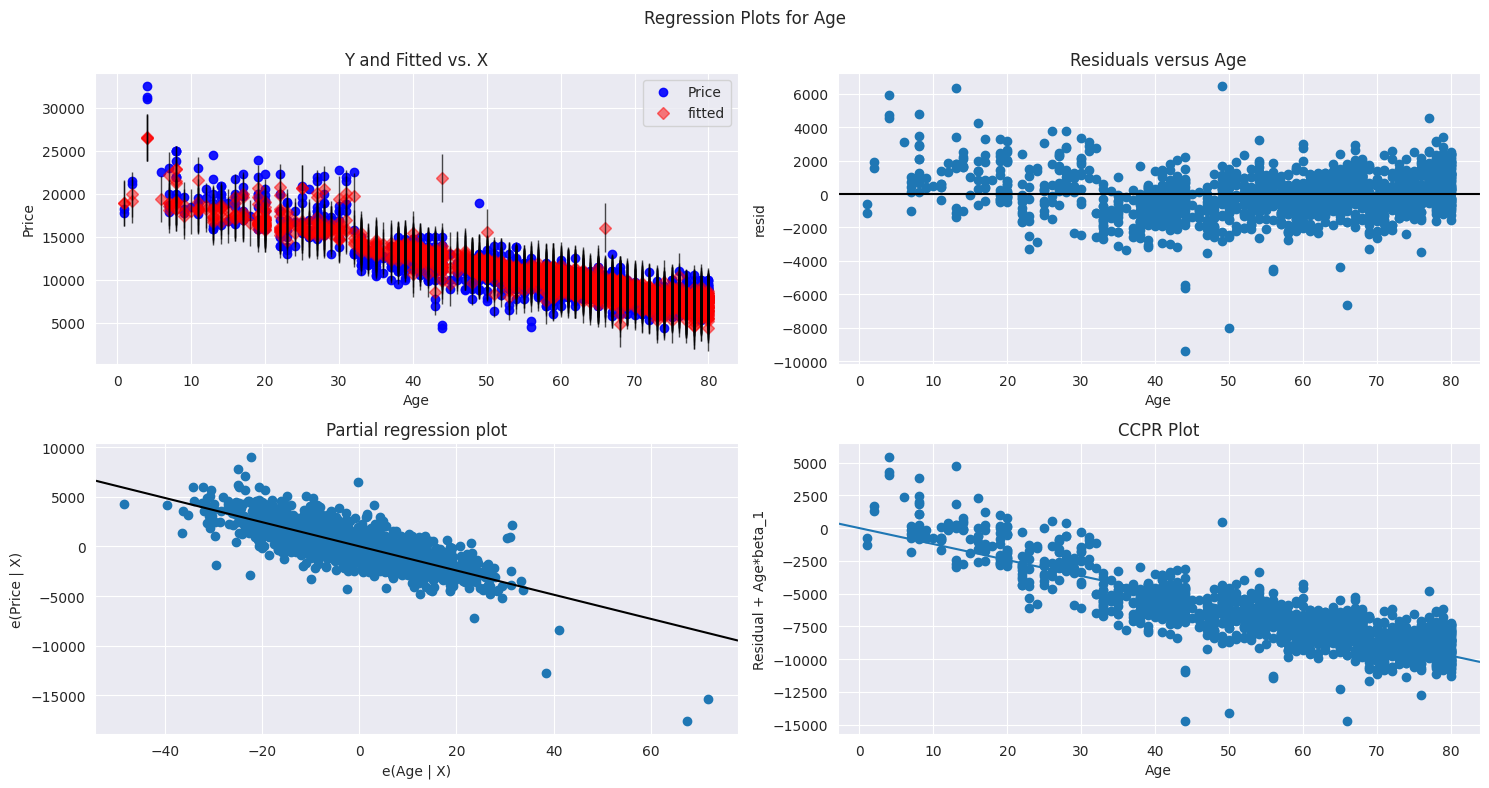

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

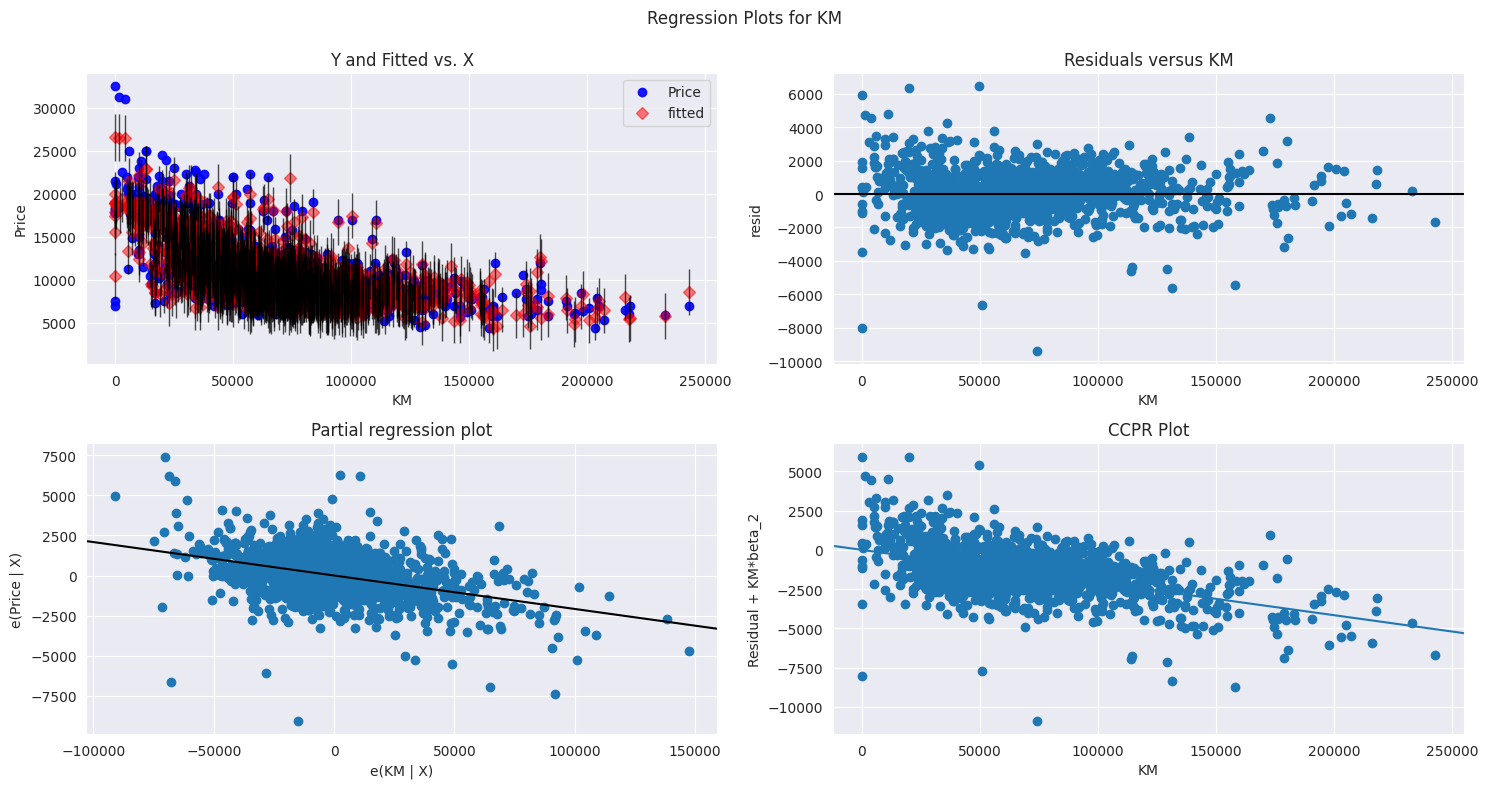

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

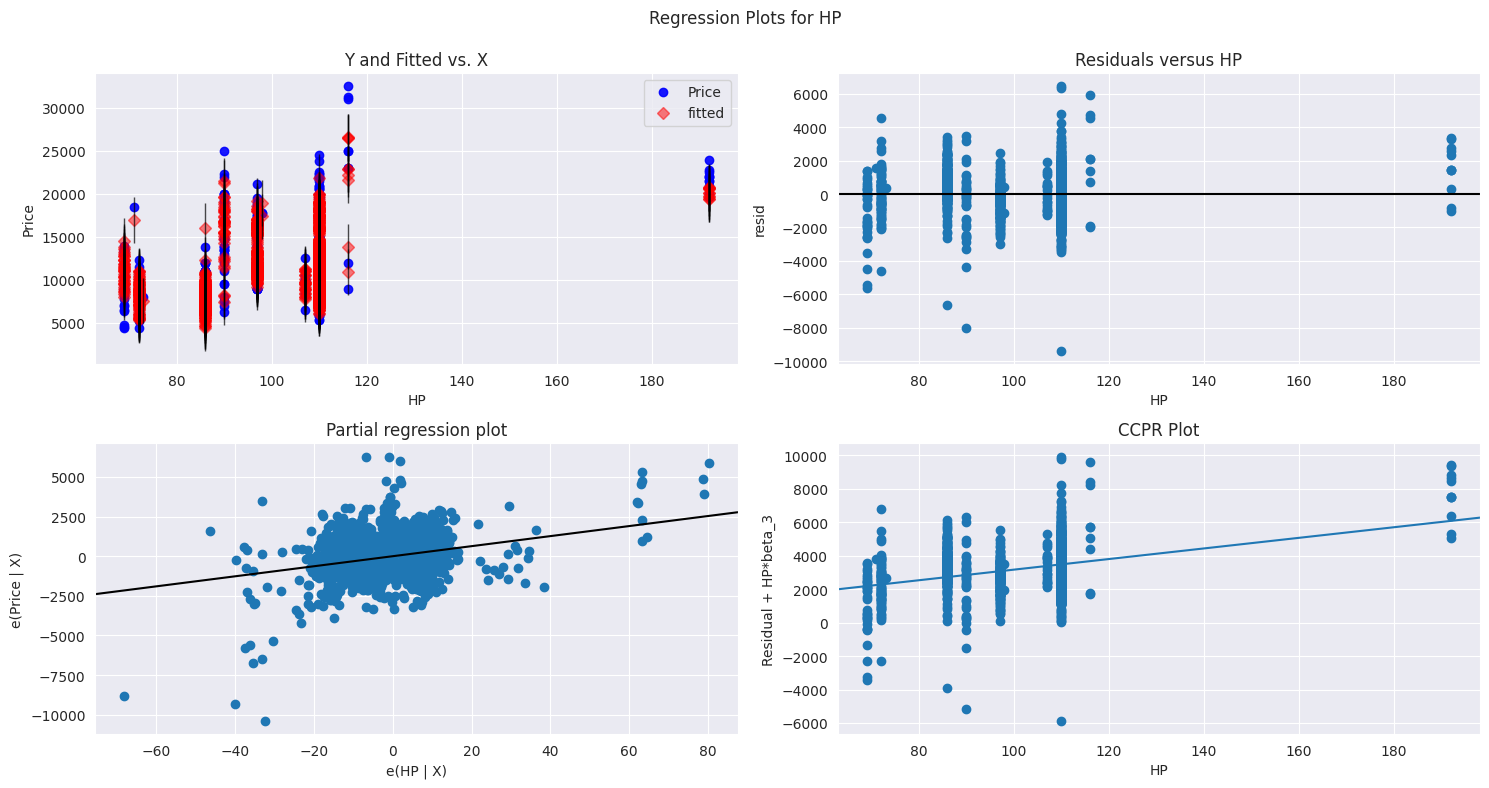

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

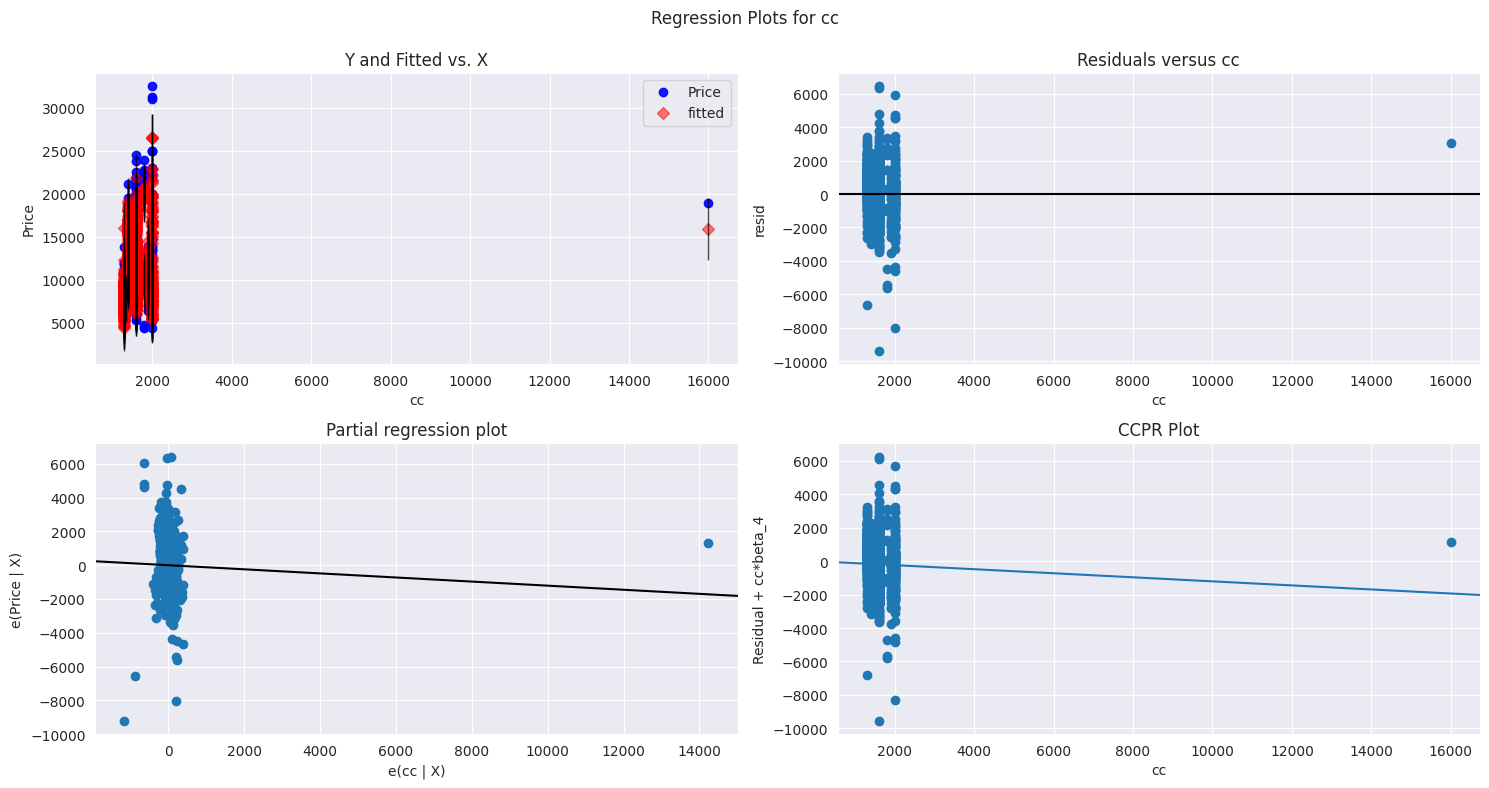

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

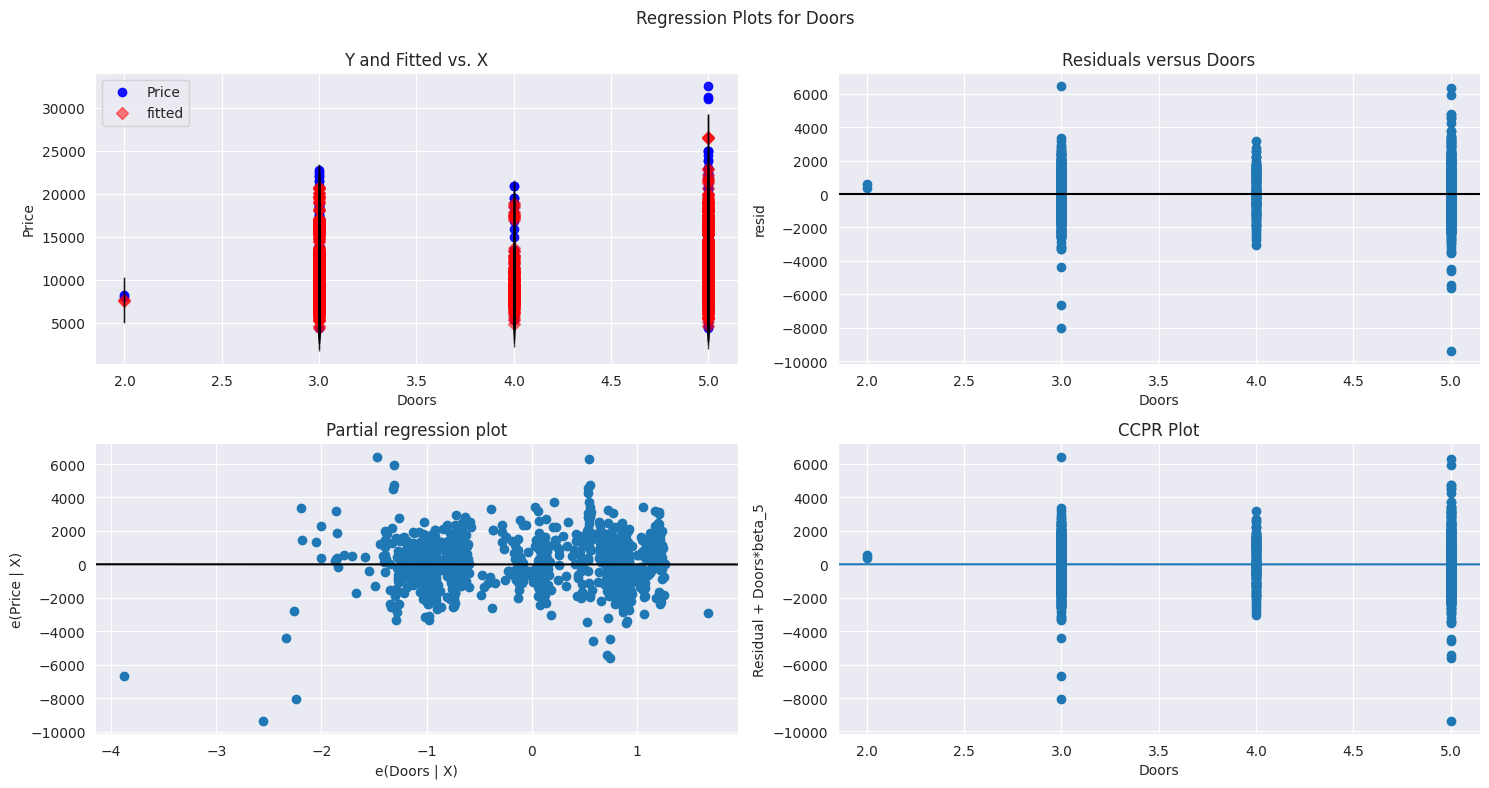

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

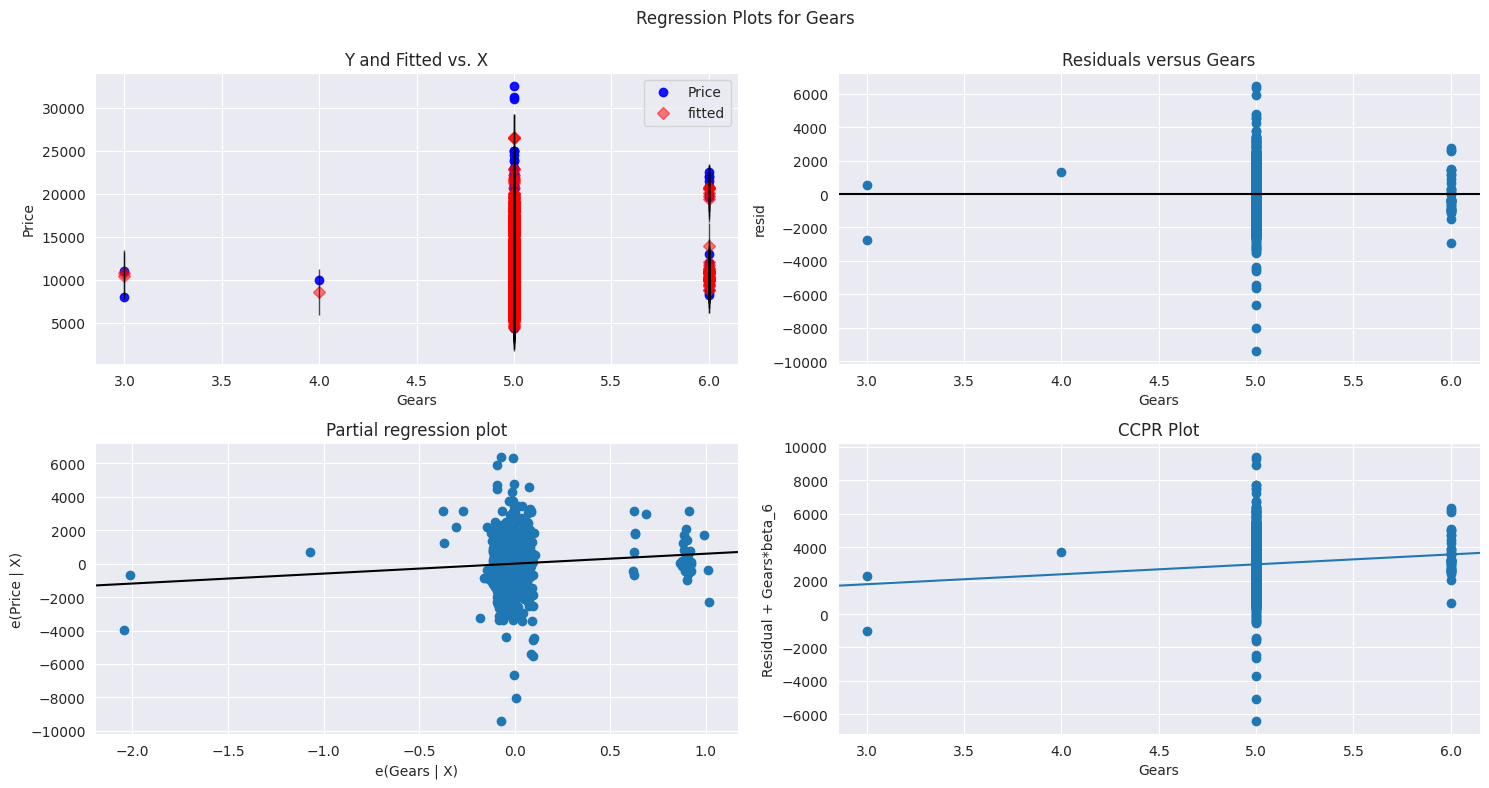

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

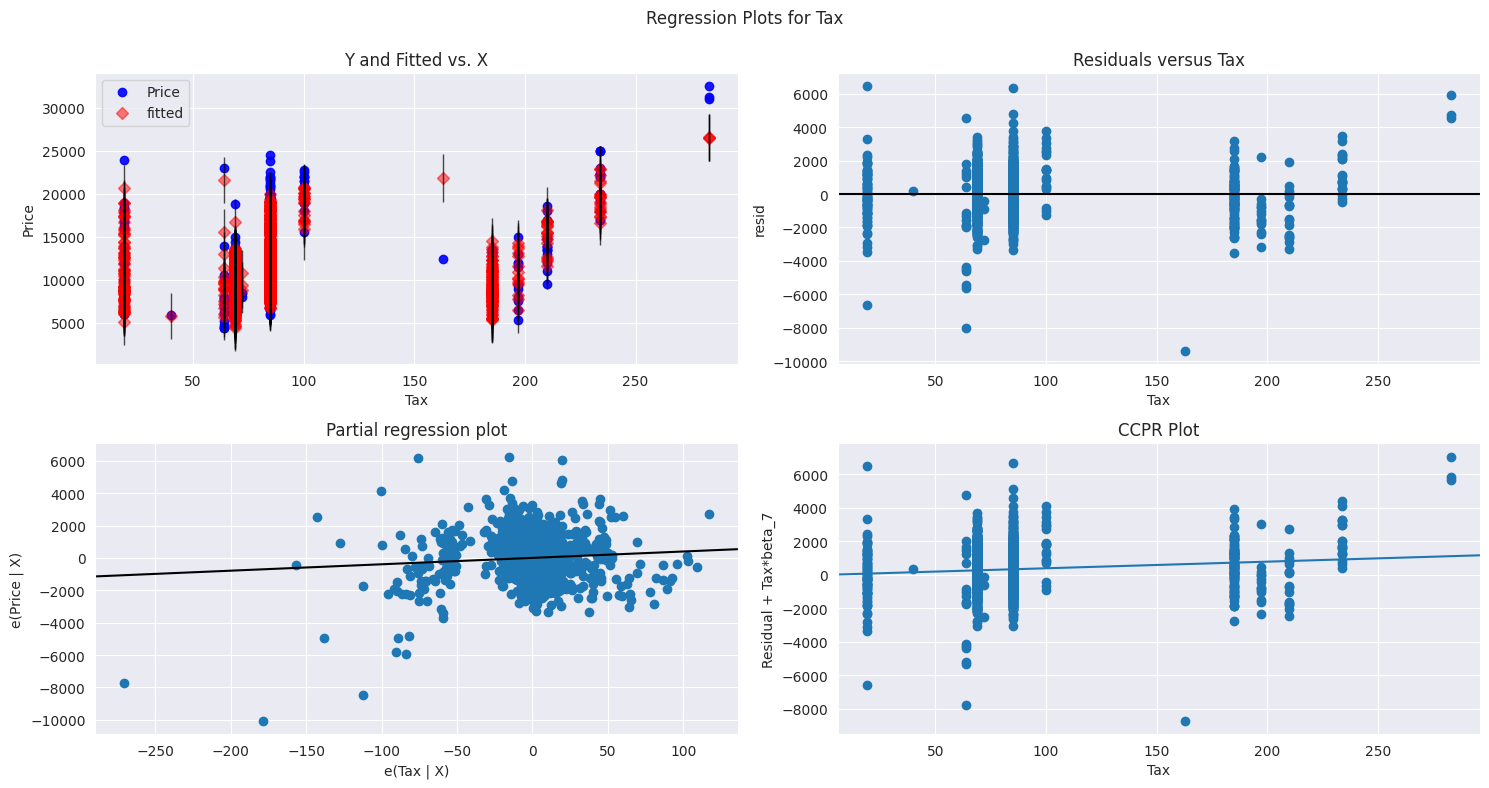

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Tax", fig=fig)
plt.show()

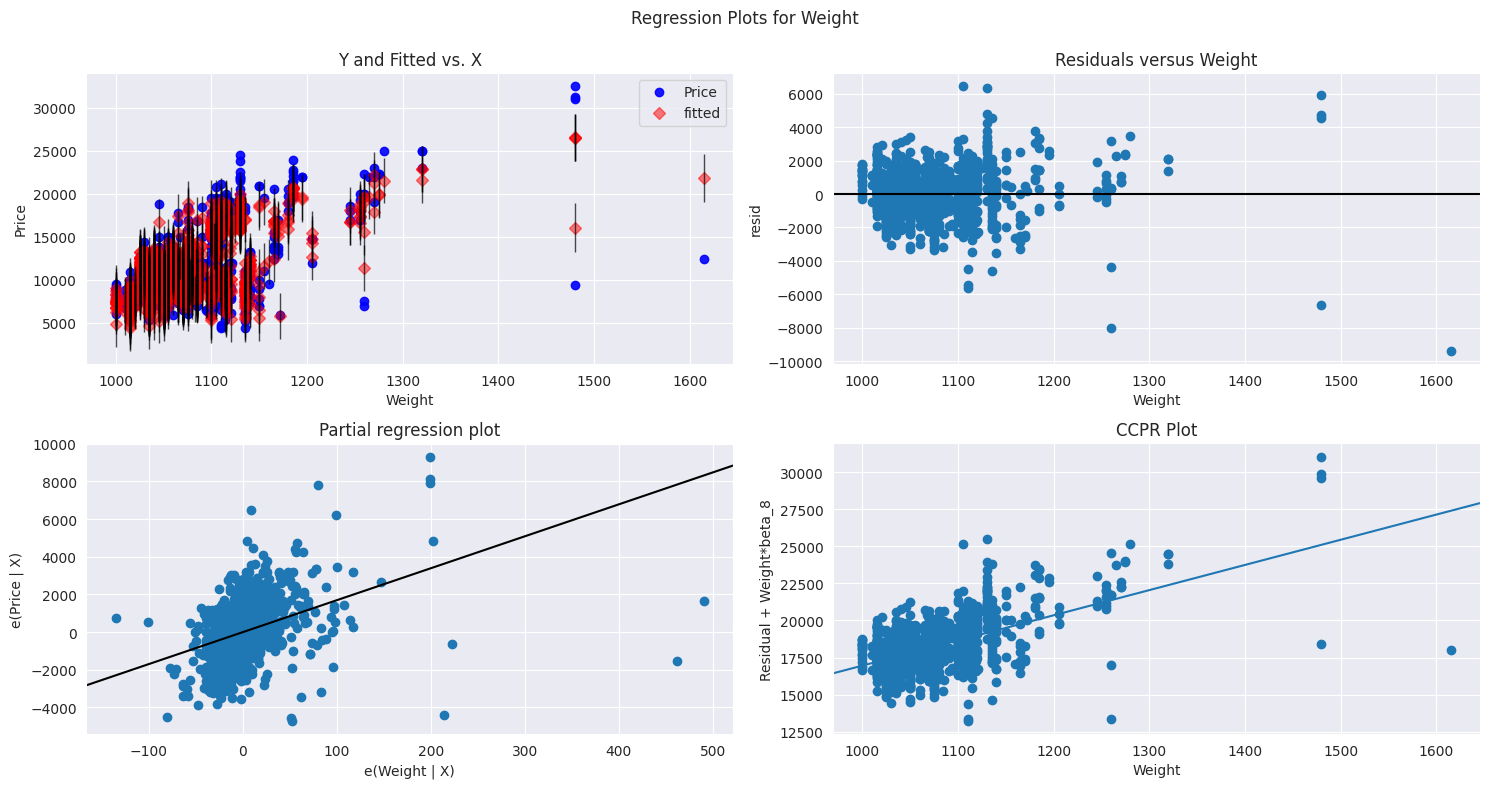

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

Model Deletion Diagnostics
Detecting Influencers/Outliers
Cook’s Distance

In [62]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

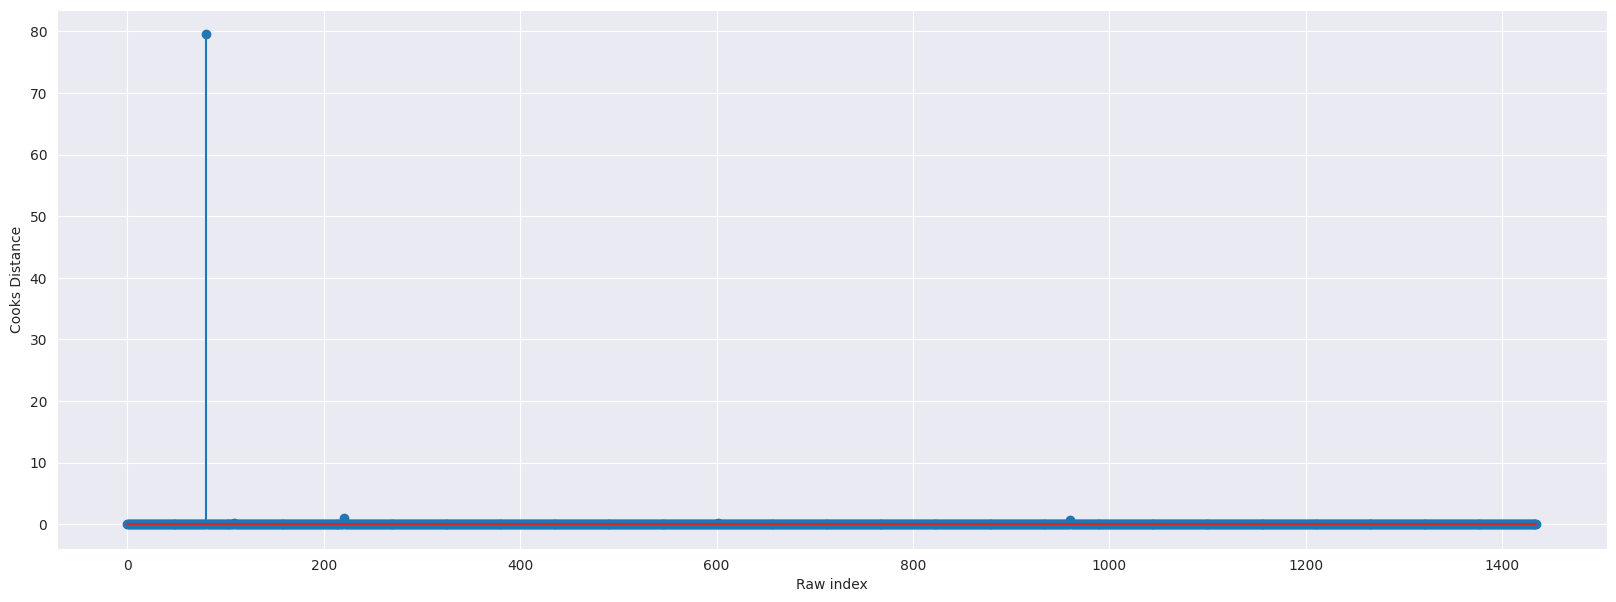

In [64]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()


In [65]:
(np.argmax(c),np.max(c))

(80, 79.52010624141815)

High Influence points

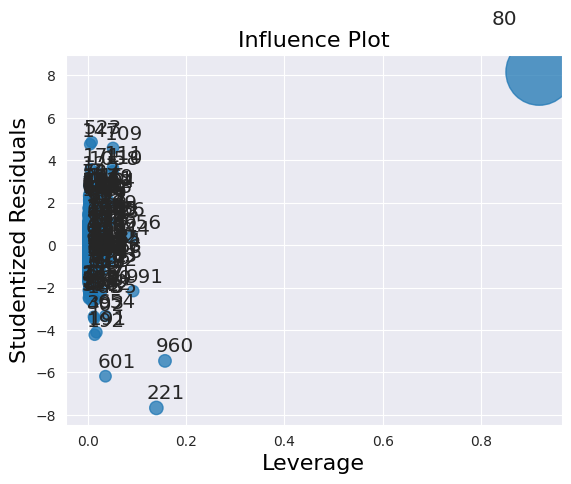

In [66]:
influence_plot(model)
plt.show()

In [68]:
cars.head(962)


,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
957,8950,61,51235,86,1300,4,5,69,1000
958,8950,65,51000,86,1300,3,5,69,1015
959,8895,61,50925,110,1600,5,5,85,1070
960,9390,66,50806,86,1300,3,5,19,1480


In [71]:
car1=cars.drop(cars.index[[220,959]],axis=0).reset_index()
car=car1.drop(['index'],axis=1)
car

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [73]:
model2 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight",data = cars).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:11:23   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Tax            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
model2_influence = model2.get_influence()
(c2, _) = model2_influence.cooks_distance

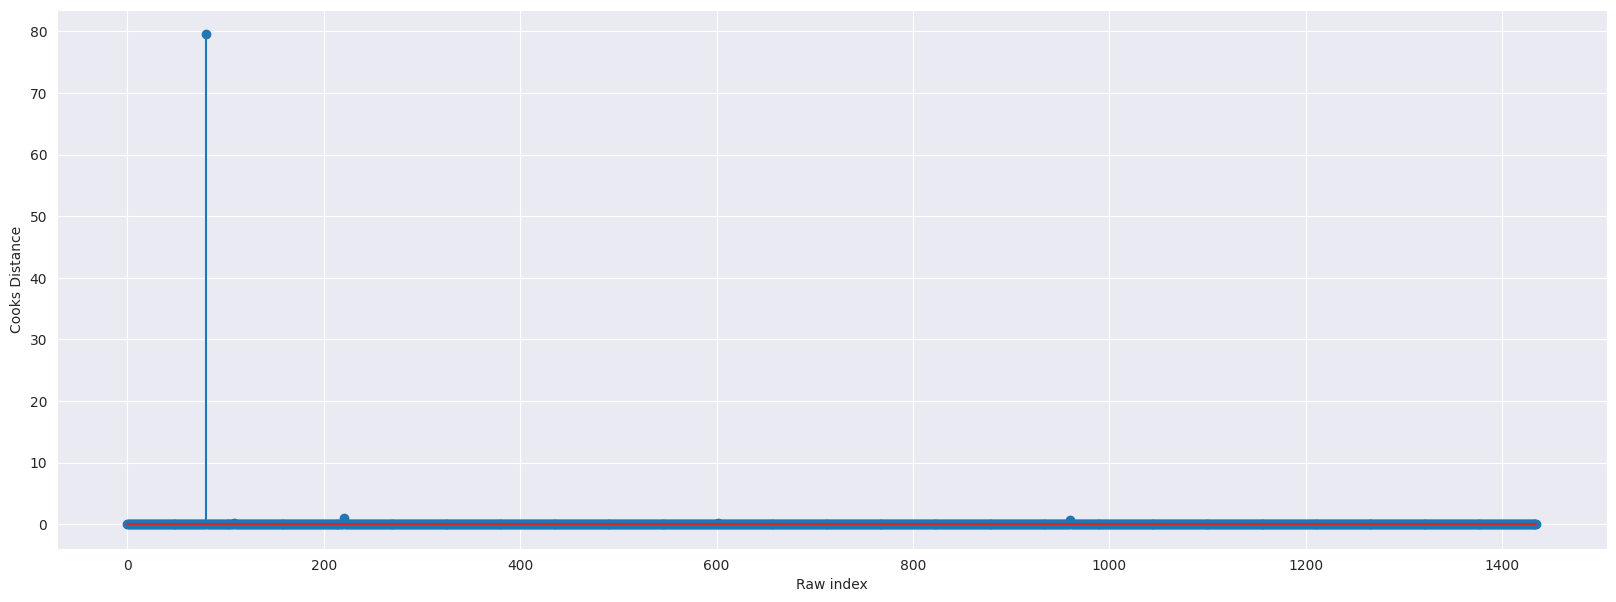

In [75]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c2, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [76]:
(np.argmax(c2),np.max(c2))

(80, 79.52010624141815)

Since the value is <1 , we can stop the diagnostic process and finalize the model


In [77]:
final_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data = cars).fit()

In [78]:
(final_model.rsquared,final_model.aic)

(0.8637627463428191, 24769.07664007625)

In [79]:
cars_new=pd.DataFrame({"Age":32,"KM":38500, "HP":78,"cc":1500,"Doors":3,"Gears":5,"Tax":200,"Weight":1200 },index=[1])
final_model.predict(cars_new)


1    16128.749635
dtype: float64

In [80]:
final_model.predict()

array([16812.58050518, 16272.3551858 , 16800.73245986, ...,
        8454.29800681,  8578.03812147, 10402.43833284])

In [81]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:17:07   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Tax            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
final_model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
Tax             3.949081
Weight         16.958632
dtype: float64

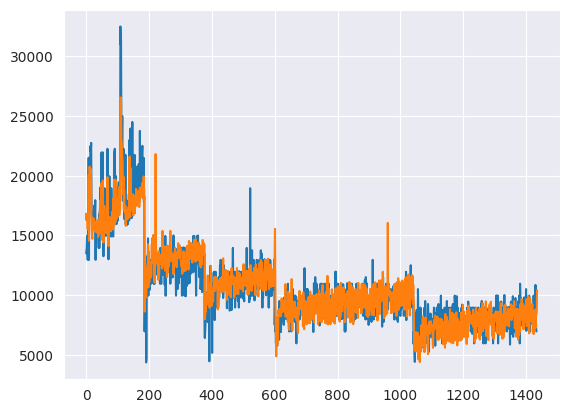

In [83]:
plt.plot(car.Price)
plt.plot(final_model.predict(cars))
plt.show()